## Rare Labels 

- Values present for a small percentage 

- Usually present less than 5% 

- Concept of cardinality 

## Rare label consequences 

- May add information in low cardinality 

- May add noise is high cardinality 


### Engineering Rare Labels 

- Replacing by most frequent label
- Grouping all rare labels together 

Categorical variables can have:

- One predominant category
- A small number of categories
- High cardinality



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/FeatureEngineering/trainh.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# get number of categories in variables 
categoricals = []
for col in data.columns:
    if data[col].dtypes =='O':
      print('{} categories : {} '.format(col, len(data[col].unique())))
      categoricals.append(col)

MSZoning categories : 5 
Street categories : 2 
Alley categories : 3 
LotShape categories : 4 
LandContour categories : 4 
Utilities categories : 2 
LotConfig categories : 5 
LandSlope categories : 3 
Neighborhood categories : 25 
Condition1 categories : 9 
Condition2 categories : 8 
BldgType categories : 5 
HouseStyle categories : 8 
RoofStyle categories : 6 
RoofMatl categories : 8 
Exterior1st categories : 15 
Exterior2nd categories : 16 
MasVnrType categories : 5 
ExterQual categories : 4 
ExterCond categories : 5 
Foundation categories : 6 
BsmtQual categories : 5 
BsmtCond categories : 5 
BsmtExposure categories : 5 
BsmtFinType1 categories : 7 
BsmtFinType2 categories : 7 
Heating categories : 6 
HeatingQC categories : 5 
CentralAir categories : 2 
Electrical categories : 6 
KitchenQual categories : 4 
Functional categories : 7 
FireplaceQu categories : 6 
GarageType categories : 7 
GarageFinish categories : 4 
GarageQual categories : 6 
GarageCond categories : 6 
PavedDrive cat

In [ ]:
# Get variables with more than n categories 
n = 8
cats = []
for col in data.columns:
    if data[col].dtypes =='O': 
        if len(data[col].unique())>n: 
            print('{} categories : {} '.format(col, len(data[col].unique())))
            cats.append(col)

Neighborhood categories : 25 
Condition1 categories : 9 
Exterior1st categories : 15 
Exterior2nd categories : 16 
SaleType categories : 9 


In [ ]:
for col in cats:
    if data[col].dtypes =='O': # if the variable is categorical
      print(100*data.groupby(col)[col].count()/np.float(len(data)))
      print()

Neighborhood
Blmngtn     1.164384
Blueste     0.136986
BrDale      1.095890
BrkSide     3.972603
ClearCr     1.917808
CollgCr    10.273973
Crawfor     3.493151
Edwards     6.849315
Gilbert     5.410959
IDOTRR      2.534247
MeadowV     1.164384
Mitchel     3.356164
NAmes      15.410959
NPkVill     0.616438
NWAmes      5.000000
NoRidge     2.808219
NridgHt     5.273973
OldTown     7.739726
SWISU       1.712329
Sawyer      5.068493
SawyerW     4.041096
Somerst     5.890411
StoneBr     1.712329
Timber      2.602740
Veenker     0.753425
Name: Neighborhood, dtype: float64

Condition1
Artery     3.287671
Feedr      5.547945
Norm      86.301370
PosA       0.547945
PosN       1.301370
RRAe       0.753425
RRAn       1.780822
RRNe       0.136986
RRNn       0.342466
Name: Condition1, dtype: float64

Exterior1st
AsbShng     1.369863
AsphShn     0.068493
BrkComm     0.136986
BrkFace     3.424658
CBlock      0.068493
CemntBd     4.178082
HdBoard    15.205479
ImStucc     0.068493
MetalSd    15.068493


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[cats], data.SalePrice,
                                                    test_size=0.2)
X_train.shape, X_test.shape

((1168, 5), (292, 5))

In [ ]:
def label_encoder(X_train, X_test, columns, na_flag = False):
  import random
  for col in columns:
      mapper = {k:i for i, k in enumerate(X_train[col].unique(), 0)}
      if na_flag:
        mapper[np.nan] = np.nan
      X_train.loc[:, col] = X_train.loc[:, col].map(mapper)
      X_test.loc[:, col] = X_test.loc[:, col].map(mapper)
      X_test[col] = X_test[col].fillna(random.choice(list(mapper.values())))

In [ ]:
label_encoder(X_train, X_test, cats)

In [ ]:
X_train.isnull().sum()

Neighborhood    0
Condition1      0
Exterior1st     0
Exterior2nd     0
SaleType        0
dtype: int64

In [ ]:
X_test.isnull().sum()

Neighborhood    0
Condition1      0
Exterior1st     0
Exterior2nd     0
SaleType        0
dtype: int64

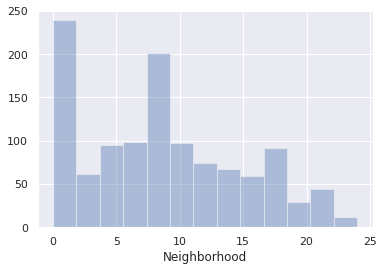

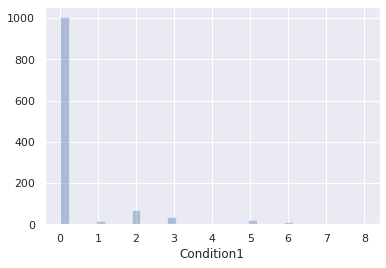

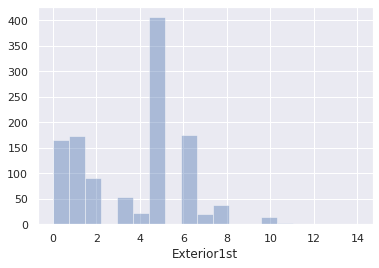

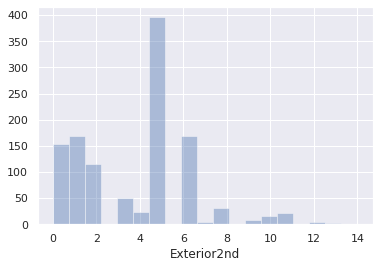

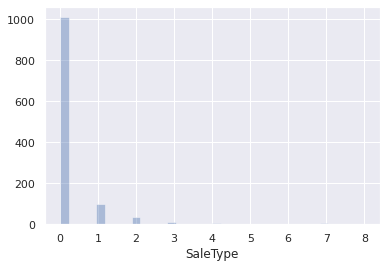

In [ ]:
sns.set()
for i in cats:
  plt.figure()
  sns.distplot(X_train[i], kde=False)

In [ ]:
def new_label_imputation(Xtrain, Xtest, threshold, cats):
  X_train, X_test = Xtrain.copy(), Xtest.copy()
  for col in cats:
      rows = len(X_train)
      temp_df = pd.Series(100*X_train[col].value_counts() / rows)
      nonrares = temp_df[temp_df>=threshold].index # non-rare labels
              
      X_train[col] = np.where(Xtrain[col].isin(nonrares), Xtrain[col], 'rare')
      X_test[col] = np.where(Xtest[col].isin(nonrares), Xtest[col], 'rare')
  return X_train, X_test


In [ ]:
X_train_rare, X_test_rare = new_label_imputation(X_train, X_test, 10, cats)

In [ ]:
label_encoder(X_train_rare, X_test_rare, cats)

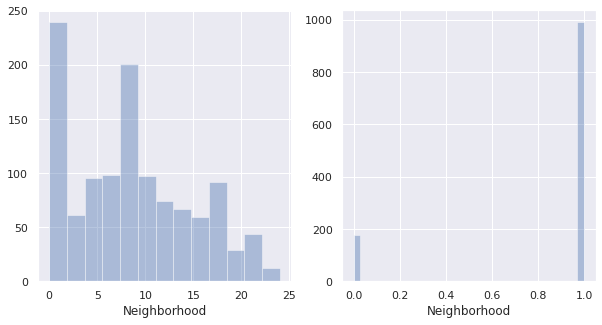

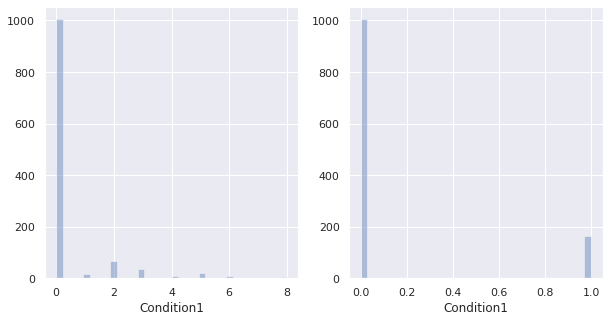

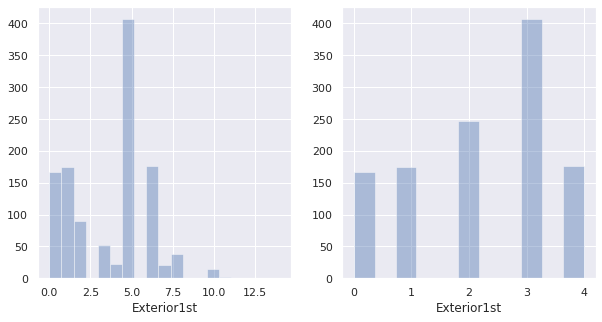

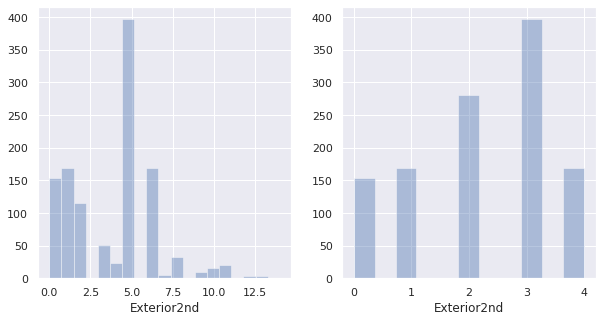

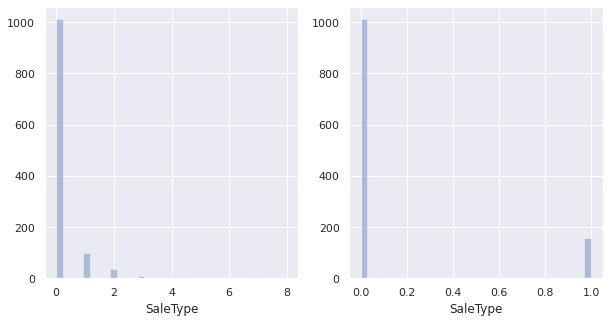

In [ ]:
sns.set()
for i in cats:
  fig, ax = plt.subplots(1,2, figsize=(10,5))
  sns.distplot(X_train[i], kde=False, ax=ax[0])
  sns.distplot(X_train_rare[i], kde=False, ax=ax[1])

In [ ]:
def frequent_imputation(Xtrain, Xtest, threshold, cats):
  X_train, X_test = Xtrain.copy(), Xtest.copy()
  for col in cats:
      rows = len(X_train)
      temp_df = pd.Series(100*X_train[col].value_counts() / rows)
      nonrares = temp_df[temp_df>=threshold].index # non-rare labels
      
      frequent_cat = X_train.groupby(col)[col].count().sort_values().tail(1).index.values[0]
        
      X_train[col] = np.where(Xtrain[col].isin(nonrares), Xtrain[col], frequent_cat)
      X_test[col] = np.where(Xtest[col].isin(nonrares), Xtest[col], frequent_cat)

  return X_train, X_test

In [ ]:
X_train_freq, X_test_freq = frequent_imputation(X_train, X_test, 10, cats)

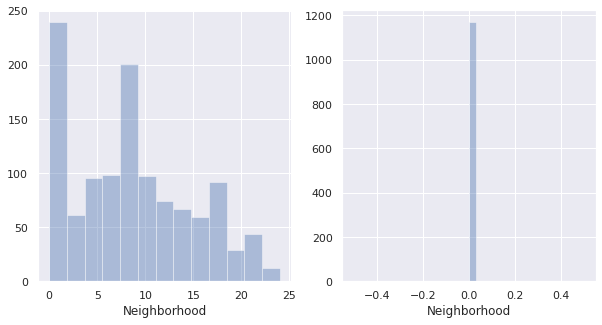

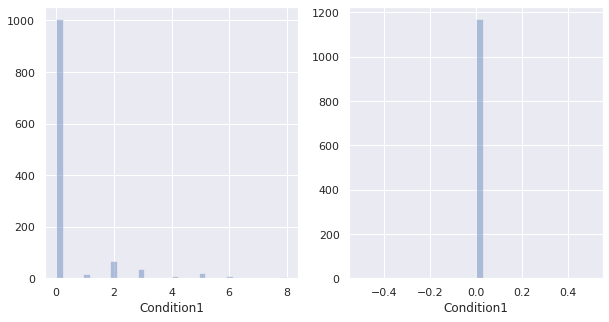

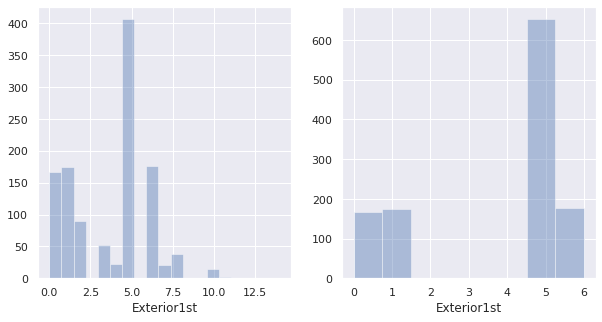

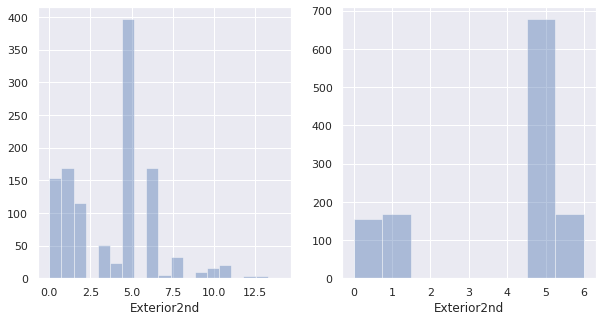

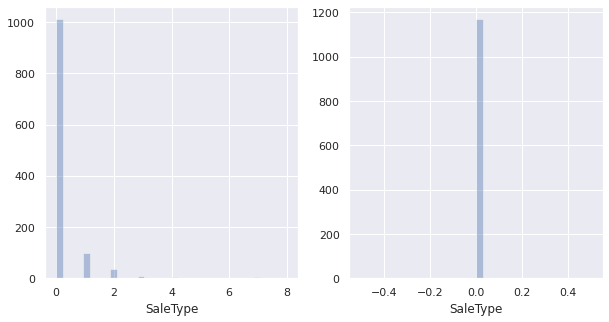

In [ ]:
sns.set()
for i in cats:
  fig, ax = plt.subplots(1,2, figsize=(10,5))
  sns.distplot(X_train[i], kde=False, ax=ax[0])
  sns.distplot(X_train_freq[i], kde=False, ax=ax[1])

In [ ]:
def regressor(X_train, y_train, X_test, y_test, cols, model):
  from sklearn.metrics import mean_squared_error
  model.fit(X_train[cols],y_train)
  y_pred = model.predict(X_test[cols])
  print(mean_squared_error(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
regressor(X_train_rare, y_train, X_test_rare, y_test, cats, model)
regressor(X_train_freq, y_train, X_test_freq, y_test, cats, model)

6192859555.198214
6257449625.025981


In [ ]:
from sklearn.linear_model import RidgeCV
model = RidgeCV()
regressor(X_train, y_train, X_test, y_test, cats, model)

5514145768.797146


In [ ]:
from sklearn.linear_model import Ridge
model = RidgeCV()
regressor(X_train, y_train, X_test, y_test, cats, model)

5514145768.797146


In [ ]:
from sklearn.svm import SVR
model = SVR()
regressor(X_train, y_train, X_test, y_test, cats, model)

7092092247.838957


In [ ]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
regressor(X_train, y_train, X_test, y_test, cats, model)

38709345409.163246


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.svm import LinearSVR
model = LinearSVR()
regressor(X_train, y_train, X_test, y_test, cats, model)

14908937618.236301


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
regressor(X_train, y_train, X_test, y_test, cats, model)

2814600795.778766


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
regressor(X_train, y_train, X_test, y_test, cats, model)

3416904040.434668


In [ ]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
regressor(X_train, y_train, X_test, y_test, cats, model)

5726150347.267789
